# Polynomial Regression w/o Scikit Learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('tempyield.csv')
X = data['Temp'].values
y = data['Yield'].values

In [19]:
# Ensure X is a 1D array with shape (len(X),) or a 2D column vector (len(X), 1)
if X.ndim == 1:
    X = X[:, np.newaxis]  # Convert to a 2D column vector

# Stack the ones array horizontally, ensuring each data point has an intercept term
lin_reg = np.hstack([X, np.ones((len(X), 1))])

# Now solve the least squares problem
m, c = np.linalg.lstsq(lin_reg, y, rcond=None)[0]


In [14]:
m

np.float64(0.0067567567567567354)

In [15]:
c

np.float64(2.306306306306309)

In [20]:
# Ensure X is a 1D array
X = np.ravel(X)  # This flattens the array if it's 2D

# Stack the quadratic, linear, and intercept terms
mult_reg = np.vstack([X**2, X, np.ones(len(X))]).T

# Solve the least squares problem
a, b, c_poly = np.linalg.lstsq(mult_reg, y, rcond=None)[0]


In [21]:
a

np.float64(0.001075601374570446)

In [22]:
b

np.float64(-0.15371134020618538)

In [23]:
c_poly

np.float64(7.960481099656345)

In [24]:
y_pred_linear = m * X + c
y_pred_mult = a * X**2 + b * X + c_poly
mse_linear = np.mean((y - y_pred_linear)**2)
rmse_linear = np.sqrt(mse_linear)
mse_poly = np.mean((y - y_pred_mult)**2)
rmse_poly = np.sqrt(mse_poly)

In [25]:
mse_linear

np.float64(0.13270870870870868)

In [26]:
mse_poly

np.float64(0.047784650630011534)

In [27]:
rmse_linear

np.float64(0.3642920651190589)

In [28]:
rmse_poly

np.float64(0.21859700508015092)

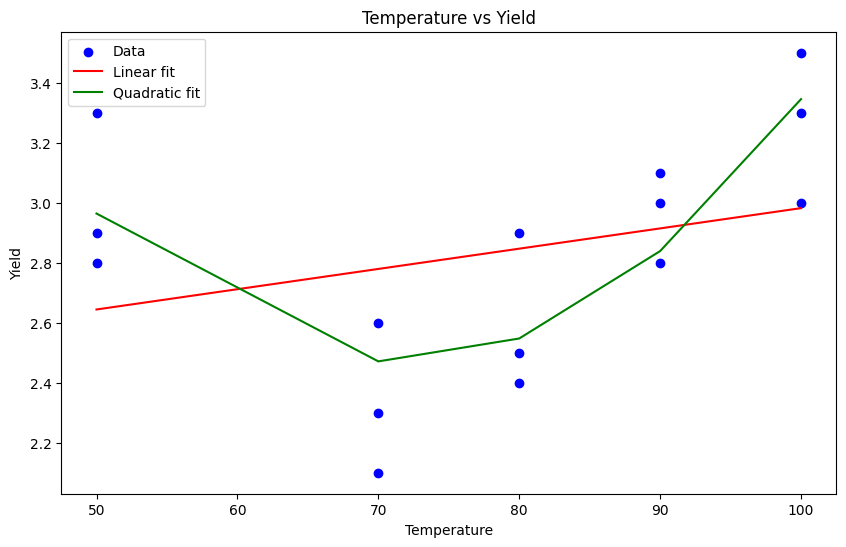

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_linear, color='red', label='Linear fit')
plt.plot(X, y_pred_mult, color='green', label='Quadratic fit')
plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Temperature vs Yield')
plt.legend()
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('infac_area.csv')
df

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0
5,0.311,0.82,3,0,0
6,0.418,0.95,3,0,0
7,0.480,1.06,3,0,0
8,0.687,1.20,3,0,0
9,0.847,1.47,3,0,0


In [14]:
X = df[['Area', 'Group', 'X2', 'X3']].values
y = df['Infarc'].values

In [15]:
X

array([[0.34, 3.  , 0.  , 0.  ],
       [0.64, 3.  , 0.  , 0.  ],
       [0.76, 3.  , 0.  , 0.  ],
       [0.83, 3.  , 0.  , 0.  ],
       [0.73, 3.  , 0.  , 0.  ],
       [0.82, 3.  , 0.  , 0.  ],
       [0.95, 3.  , 0.  , 0.  ],
       [1.06, 3.  , 0.  , 0.  ],
       [1.2 , 3.  , 0.  , 0.  ],
       [1.47, 3.  , 0.  , 0.  ],
       [0.44, 1.  , 1.  , 0.  ],
       [0.77, 1.  , 1.  , 0.  ],
       [0.9 , 1.  , 1.  , 0.  ],
       [1.07, 1.  , 1.  , 0.  ],
       [1.01, 1.  , 1.  , 0.  ],
       [1.03, 1.  , 1.  , 0.  ],
       [1.16, 1.  , 1.  , 0.  ],
       [1.21, 1.  , 1.  , 0.  ],
       [1.2 , 1.  , 1.  , 0.  ],
       [1.22, 1.  , 1.  , 0.  ],
       [0.99, 1.  , 1.  , 0.  ],
       [0.77, 2.  , 0.  , 1.  ],
       [1.05, 2.  , 0.  , 1.  ],
       [1.06, 2.  , 0.  , 1.  ],
       [1.02, 2.  , 0.  , 1.  ],
       [0.99, 2.  , 0.  , 1.  ],
       [0.97, 2.  , 0.  , 1.  ],
       [1.12, 2.  , 0.  , 1.  ],
       [1.23, 2.  , 0.  , 1.  ],
       [1.19, 2.  , 0.  , 1.  ],
       [1.

In [16]:
y

array([0.119, 0.19 , 0.395, 0.469, 0.13 , 0.311, 0.418, 0.48 , 0.687,
       0.847, 0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22 , 0.299,
       0.35 , 0.35 , 0.588, 0.379, 0.149, 0.316, 0.39 , 0.429, 0.477,
       0.439, 0.446, 0.538, 0.625, 0.974])

In [17]:
X_transpose = X.T

In [20]:
coefficients = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
coefficients

array([ 0.61265498, -0.04484546, -0.33317315, -0.11050115])

In [22]:
y_pred = X @ coefficients
y_pred

array([ 0.07376631,  0.25756281,  0.3310814 ,  0.37396725,  0.31270175,
        0.3678407 ,  0.44748585,  0.5148779 ,  0.60064959,  0.76606644,
       -0.10845042,  0.09372572,  0.17337087,  0.27752221,  0.24076291,
        0.25301601,  0.33266116,  0.36329391,  0.35716736,  0.36942046,
        0.22850981,  0.27155226,  0.44309565,  0.4492222 ,  0.424716  ,
        0.40633635,  0.39408325,  0.4859815 ,  0.55337355,  0.52886735,
        0.547247  ,  0.65752489])

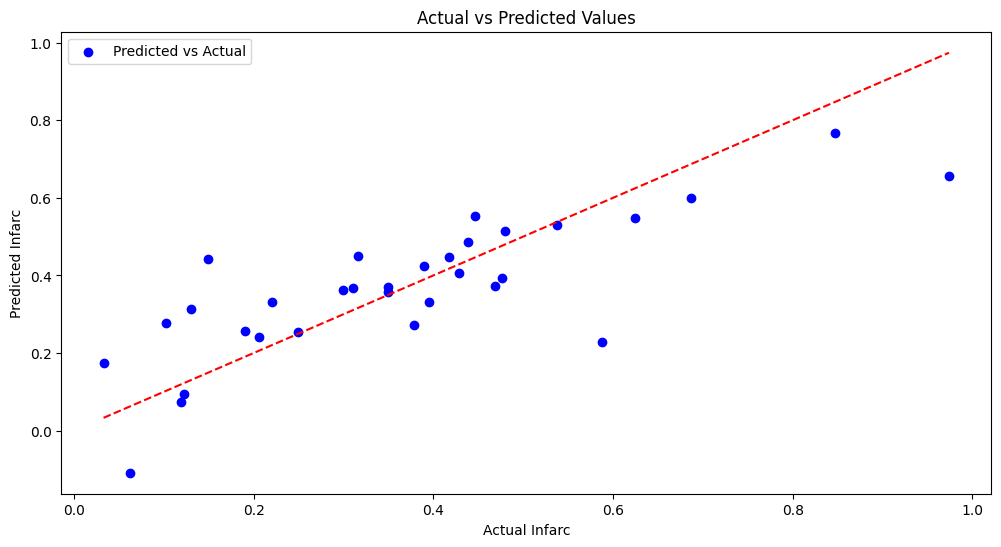

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Infarc')
plt.ylabel('Predicted Infarc')
plt.title('Actual vs Predicted Values')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.legend()
plt.show()

In [24]:
residuals = y - y_pred
residuals

array([ 0.04523369, -0.06756281,  0.0639186 ,  0.09503275, -0.18270175,
       -0.0568407 , -0.02948585, -0.0348779 ,  0.08635041,  0.08093356,
        0.17045042,  0.02827428, -0.14037087, -0.17552221, -0.03476291,
       -0.00401601, -0.11266116, -0.06429391, -0.00716736, -0.01942046,
        0.35949019,  0.10744774, -0.29409565, -0.1332222 , -0.034716  ,
        0.02266365,  0.08291675, -0.0469815 , -0.10737355,  0.00913265,
        0.077753  ,  0.31647511])

In [25]:
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

In [26]:
rmse

np.float64(0.13049299837372194)

In [27]:
mse

np.float64(0.0170284226245642)

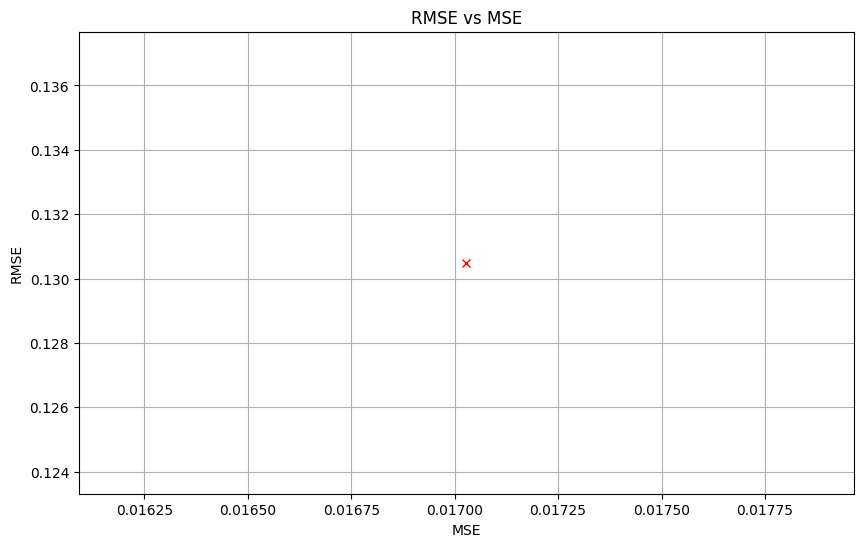

In [47]:
plt.figure(figsize=(10, 6))
plt.title('RMSE vs MSE')
plt.plot(mse, rmse,color = 'red' ,marker='x') 
plt.xlabel('MSE')
plt.ylabel('RMSE')
plt.grid(True)  
plt.show()